# Problem Statement

- The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. 
- They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

## Breakdowns
- `Perform EDA`
- `Find Population purchase of mean for Male and Female customers`
- `Find the interval within which population average lies`
- `Find the interval for confidence values of 90%, 95%, 99%`
- `Check the results of overlapping for various sample sizes`
- `Repeat the same for Gender, Age and Marital Status`
- `Business Insights and Recommendations`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
# df = pd.read_csv(r"F:\Muthu_2023\Personal\NextStep\DSCourse\Scaler\Business-Case-Study\Walmart\Dataset\walmart_data.csv")
df = pd.read_csv(r"E:\Nextstep\Scaler\Business-Case-Study\Walmart\Dataset\walmart_data.csv")

# EDA

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:

The dataset has the following features:

User_ID:	User ID
Product_ID:	Product ID
Gender:	Sex of User
Age:	Age in bins
Occupation:	Occupation(Masked)
City_Category:	Category of the City (A,B,C)
StayInCurrentCityYears:	Number of years stay in current city
Marital_Status:	Marital Status
ProductCategory:	Product Category (Masked)
Purchase:	Purchase Amount

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


**Inference:**
- No null values in any of the columns. Hence, already data is cleaned. 

In [6]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

**Inference:**
- Total Purchases: 5 million items
- Total Customers: 5,891
- Products: 3,631 unique products, categorized into 20 different categories
- Customer Gender: Binary (Male, Female)
- Customer Age: Categorized into bins
- Customer Occupation: 21 unique occupations
- Cities: Data collected for 3 different cities
- Stay In Current City Years: 5 categories
- Marital Status: Binary (Married, Unmarried)
- Purchase Amount: Numerical value

In [8]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


**Inference:**
- Occupation: The distribution is right-skewed, with more than 50% of customers falling into the categories 0-7.
- Marital Status: The distribution is right-skewed, with a significant portion of purchases made by customers categorized as 0 (unmarried).
- Product Categories: Purchases are not uniformly distributed across all product categories, with a higher preference for categories 0-5.

In [9]:
df.describe(include='object')

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


**Inference:**
- Total Products: 3,631
- Gender Distribution: Male customers purchased the majority of products.
- Age Range: Customers aged 26-35 made the majority of purchases.
- City: Customers from City B contributed to the majority of purchases.
- Stay In Current City Years: Recently moved-in customers made the most purchases.

In [6]:
cat_columns = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Occupation', 'Product_Category']

In [7]:
for col in cat_columns:
    print(col + ": " + str(np.sort(df[col].unique())))

Gender: ['F' 'M']
Age: ['0-17' '18-25' '26-35' '36-45' '46-50' '51-55' '55+']
City_Category: ['A' 'B' 'C']
Stay_In_Current_City_Years: ['0' '1' '2' '3' '4+']
Marital_Status: [0 1]
Occupation: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Product_Category: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


In [23]:
df.groupby(['User_ID','Gender']).count()

,,Product_ID,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
User_ID,Gender,,,,,,,,
1000001,F,35,35,35,35,35,35,35,35
1000002,M,77,77,77,77,77,77,77,77
1000003,M,29,29,29,29,29,29,29,29
1000004,M,14,14,14,14,14,14,14,14
1000005,M,106,106,106,106,106,106,106,106
...,...,...,...,...,...,...,...,...,...
1006036,F,514,514,514,514,514,514,514,514
1006037,F,122,122,122,122,122,122,122,122
1006038,F,12,12,12,12,12,12,12,12


## Univariate Analysis

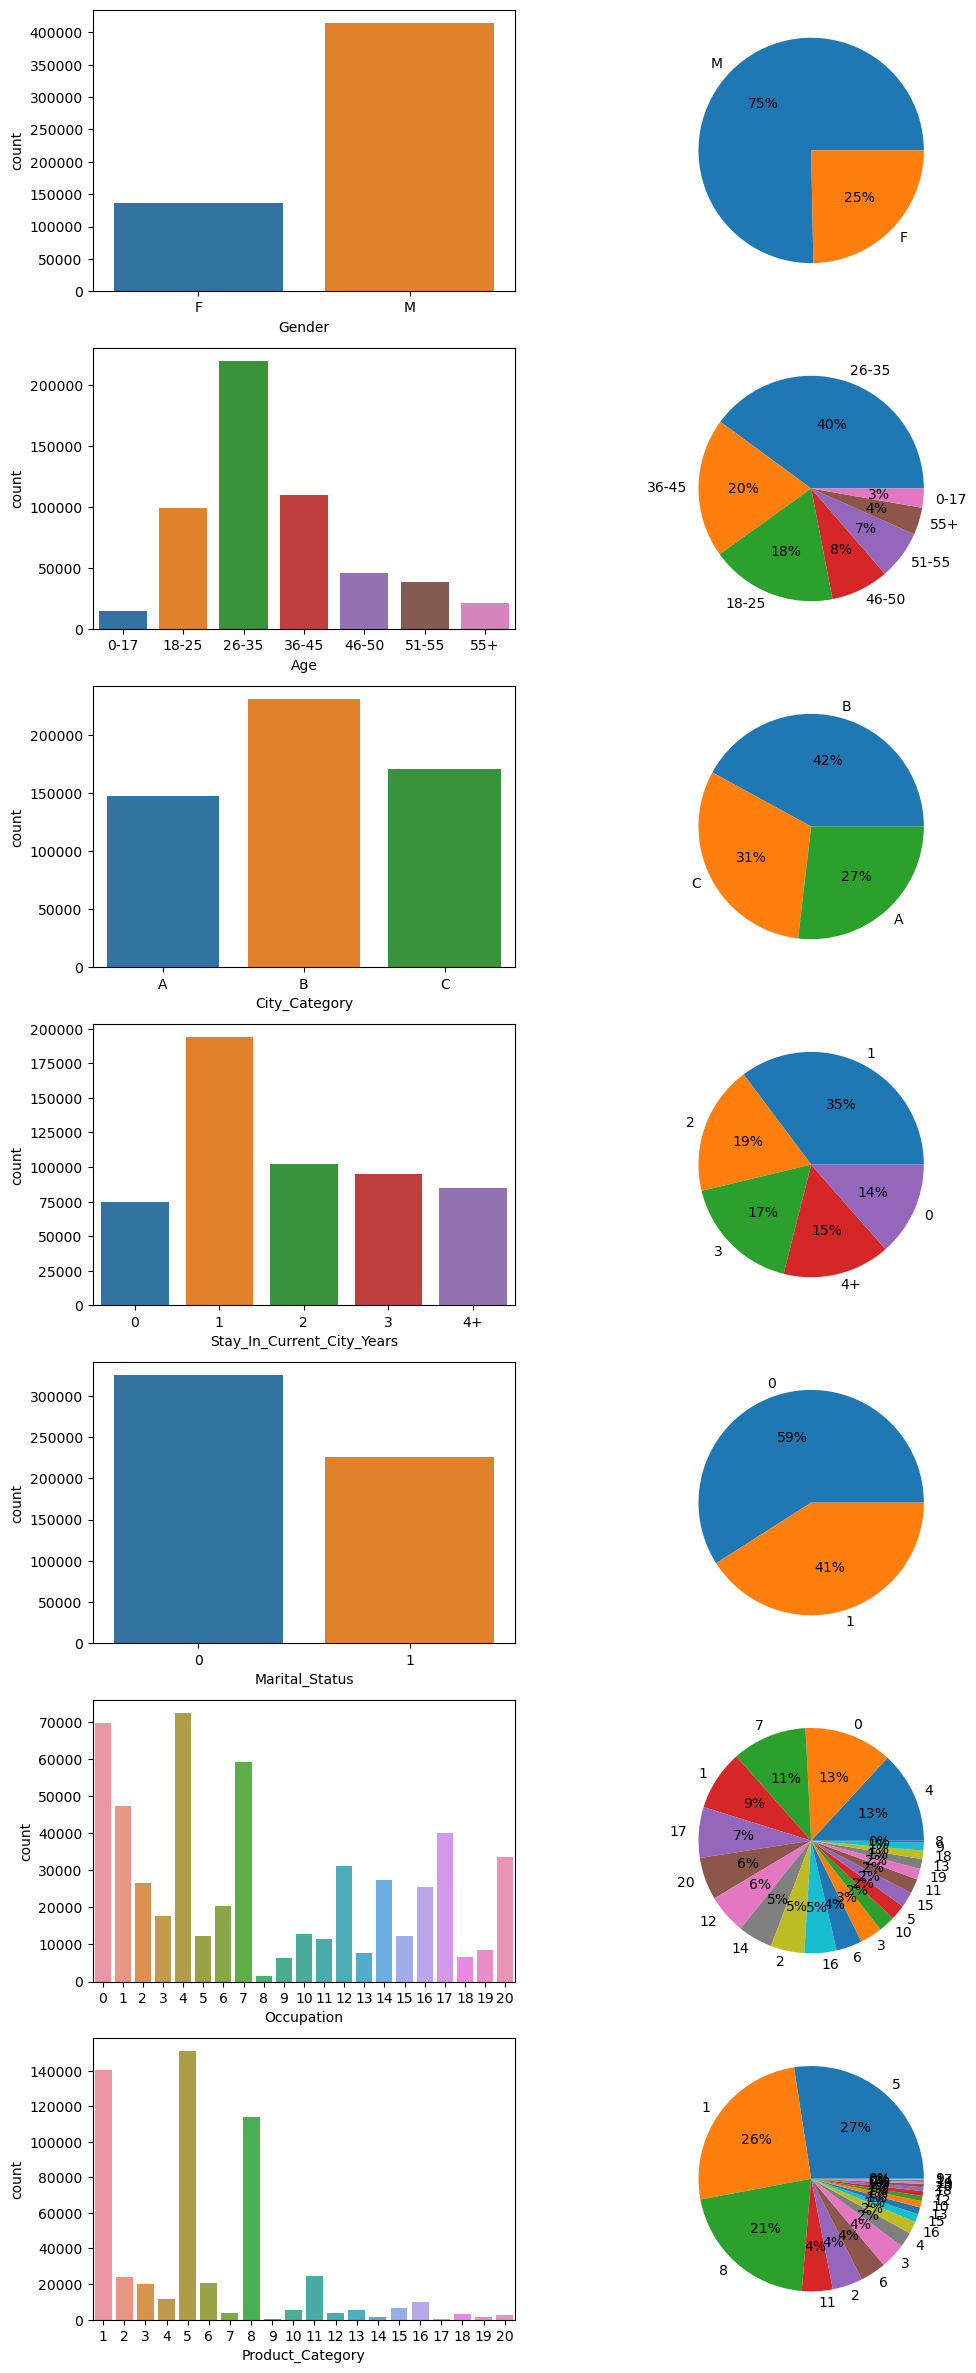

In [8]:
plt.figure(figsize=(12,30))
cnt = 1
for col in cat_columns:
    plt.subplot(len(cat_columns),2,cnt)
    sns.countplot(x = col, data = df, order = list(np.sort(df[col].value_counts().index)))
    cnt += 1
    plt.subplot(len(cat_columns),2,cnt)
    plt.pie(x = df[col].value_counts(), labels = list(df[col].value_counts().index), autopct = '%.0f%%')
    cnt += 1

**Inference:**
- Gender Distribution: Male customers accounted for 75% of the purchases.
- Age Range: Customers aged 18-45 made approximately 80% of the purchases, with the 26-35 age range being the most prominent.
- City: Customers from B city made most of the purchases (42%) followed by C (37%) and followed by A (27%)
- Stay In Current City Years: Customers who have been in the city for 1 year made the most purchases. 
  Purchases are almost equally distributed among customers with other durations of residence.
- Marital Status: Purchases are distributed with a ratio of approximately 6:4 for unmarried to married customers.
- Occupation: Customers in occupation categories 0, 1, 4, and 7 made almost 50% of the purchases.
- Product Categories: Categories 1, 5, and 8 are preferred, making up 75% of the purchases

<Figure size 1200x600 with 0 Axes>

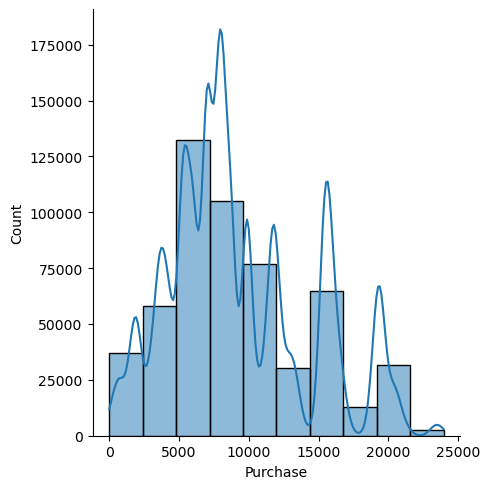

In [18]:
plt.figure(figsize=(12,6))
sns.displot(df['Purchase'], bins= 10, kde=True);

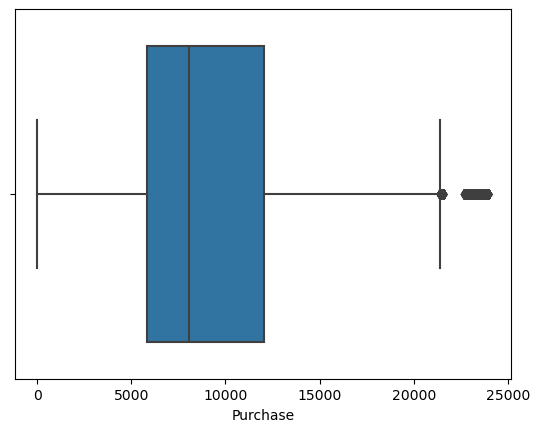

In [15]:
sns.boxplot(x = 'Purchase', data = df);

**Inference:**
- Multiple Peaks: The purchase behavior shows multiple peaks, suggesting a gap between the prices of products.
- Outliers: Some outliers are identified with purchases greater than 20,000.
- Median Purchase: The median purchase value is approximately 8,000.

## Bivariate Analysis

<Axes: xlabel='Gender', ylabel='Purchase'>

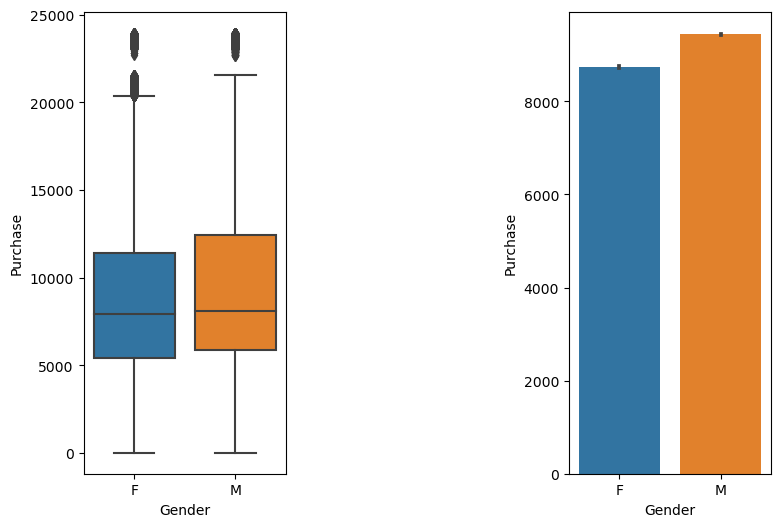

In [110]:
# Purchase Vs Gender
plt.figure(figsize=(12,6))
plt.subplot(1,4,2)
sns.boxplot(y = 'Purchase', data = df, x = 'Gender')
plt.subplot(1,4,3)
sns.barplot(data=df, x = 'Gender', y = 'Purchase', estimator='mean')
plt.show()

In [ ]:
**Inference:**
- Though the majority of purchase is made by male customers

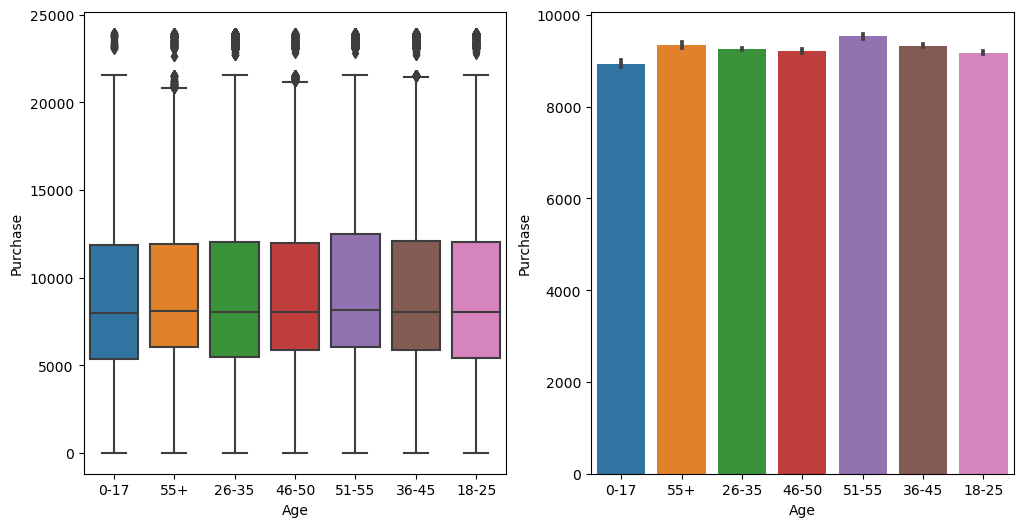

In [113]:
# Purchase Vs Age
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(y = 'Purchase', data = df, x = 'Age')
plt.subplot(1,2,2)
sns.barplot(data=df, x = 'Age', y = 'Purchase', estimator='mean')
plt.show()

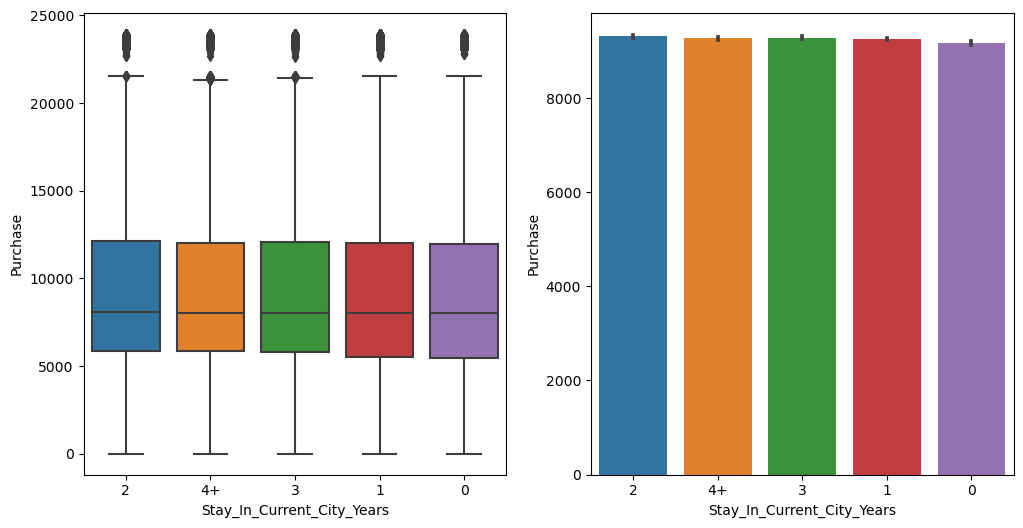

In [114]:
# Purchase Vs Stay in Current City (Years)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(y = 'Purchase', data = df, x = 'Stay_In_Current_City_Years')
plt.subplot(1,2,2)
sns.barplot(data=df, x = 'Stay_In_Current_City_Years', y = 'Purchase', estimator='mean')
plt.show()

In [83]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

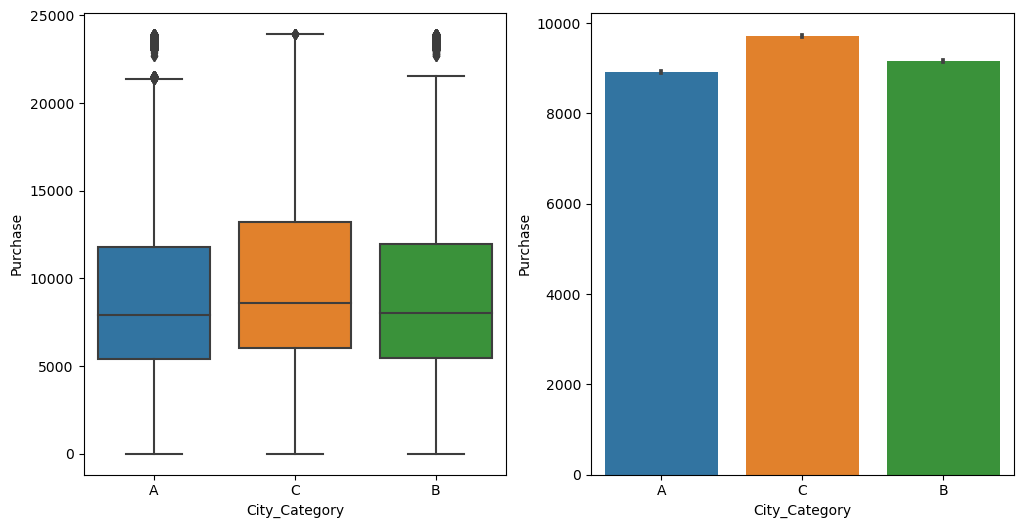

In [116]:
# Purchase Vs City
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(y = 'Purchase', data = df, x = 'City_Category')
plt.subplot(1,2,2)
sns.barplot(data=df, x = 'City_Category', y = 'Purchase', estimator='mean')
plt.show()

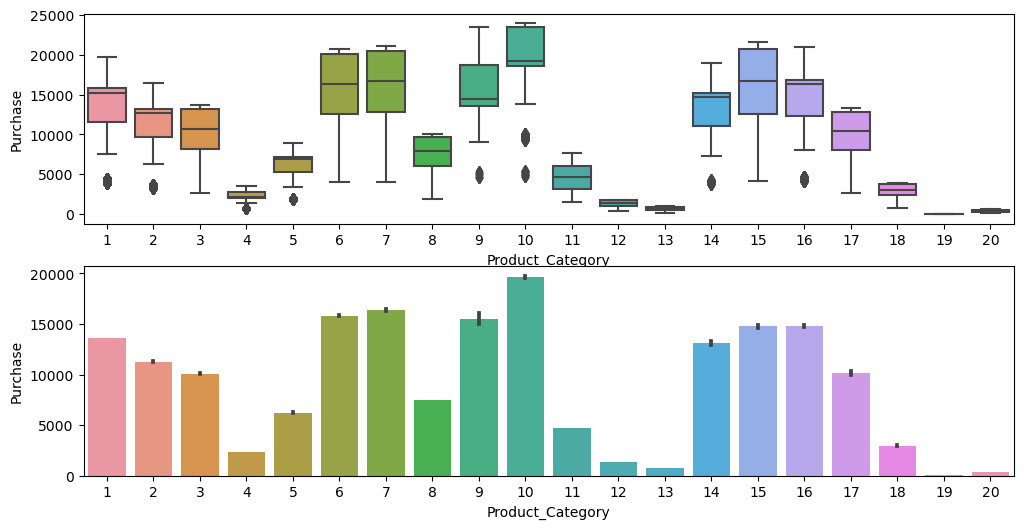

In [117]:
# Purchase Vs Stay in Current City (Years)
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
sns.boxplot(y = 'Purchase', data = df, x = 'Product_Category')
plt.subplot(2,1,2)
sns.barplot(data=df, x = 'Product_Category', y = 'Purchase', estimator='mean')
plt.show()

## Multivariate Analysis

In [88]:
df_transform = df.copy()

In [89]:
df_transform['Gender'] = df_transform['Gender'].replace({'M': 0, 'F': 1})

In [92]:
df_transform['City_Category'] = df_transform['City_Category'].replace({'A': 0, 'B': 1, 'C': 2})
df_transform['Age'] = df_transform['Age'].replace({'0-17': 0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6})

In [93]:
df_transform.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,1,0,10,0,2,0,3,8370
1,1000001,P00248942,1,0,10,0,2,0,1,15200
2,1000001,P00087842,1,0,10,0,2,0,12,1422
3,1000001,P00085442,1,0,10,0,2,0,12,1057
4,1000002,P00285442,0,6,16,2,4+,0,8,7969


<Axes: >

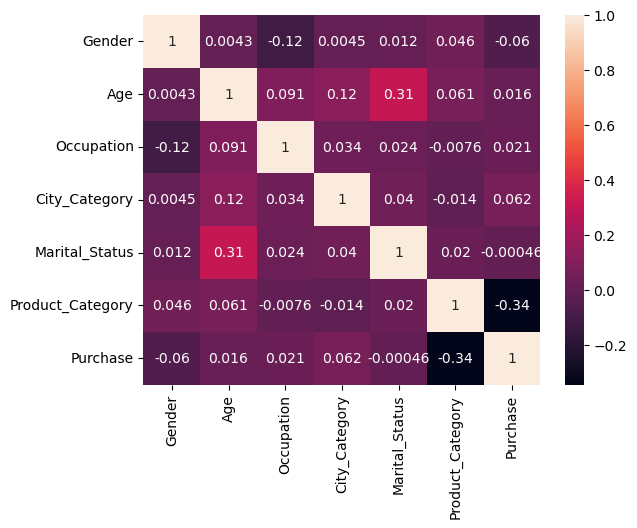

In [97]:
sns.heatmap(df_transform.drop(['User_ID', 'Product_ID', 'Stay_In_Current_City_Years'], axis=1).corr(), annot=True)

In [ ]:
**Inference:**
- Age and Marital status are highly correlated.


C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


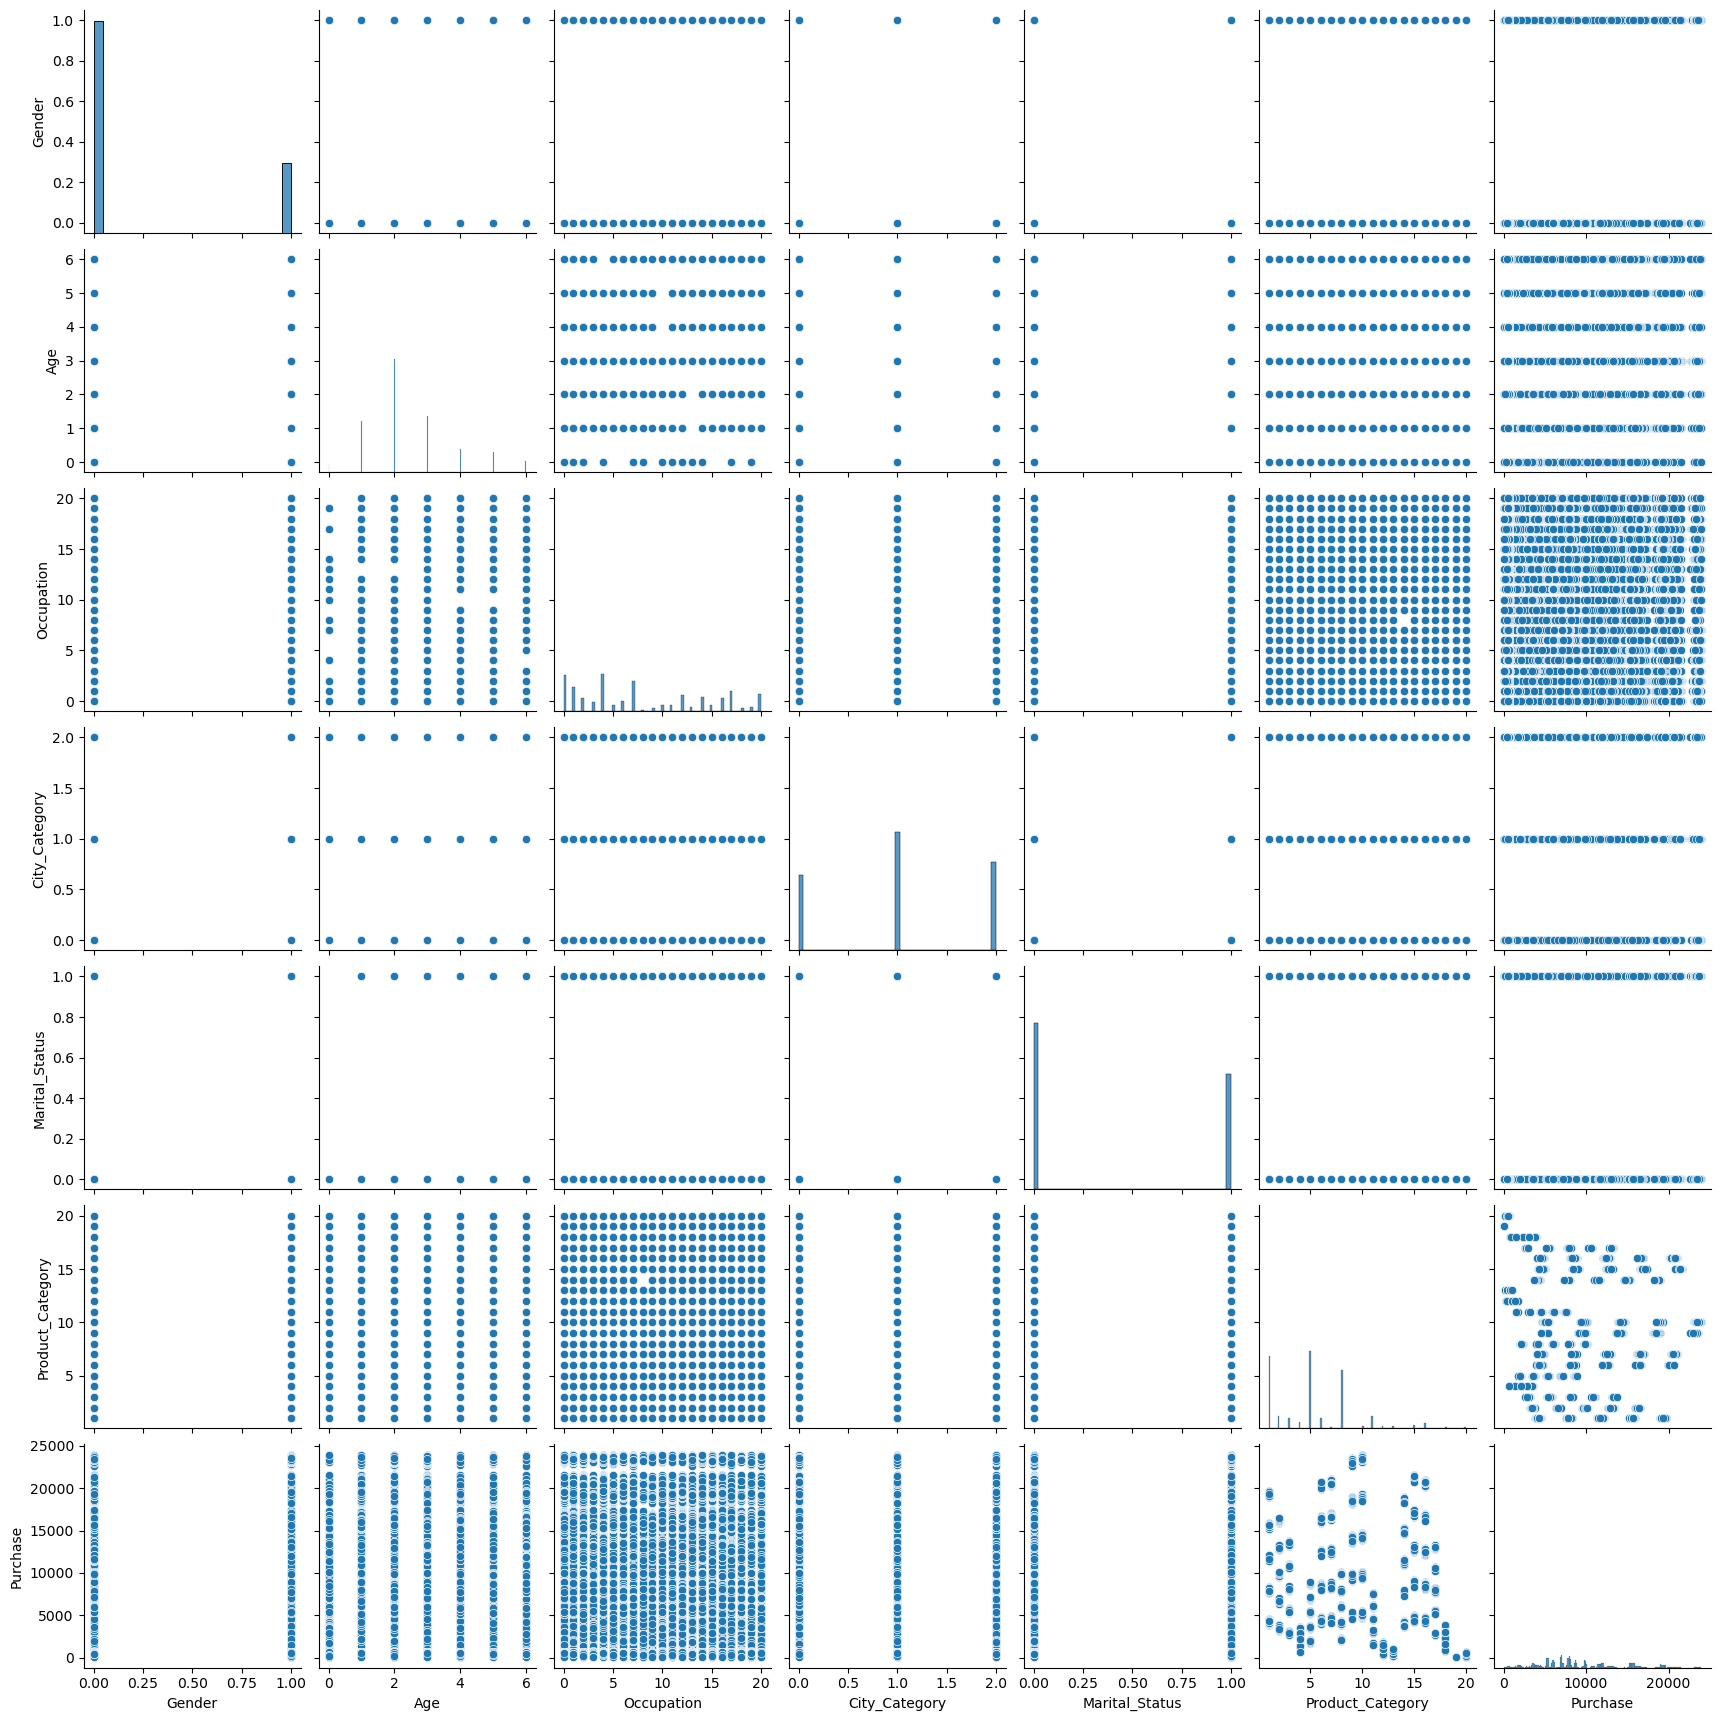

In [98]:
sns.pairplot(df_transform.drop(['User_ID', 'Product_ID', 'Stay_In_Current_City_Years'], axis=1))

# Questions

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x600 with 0 Axes>

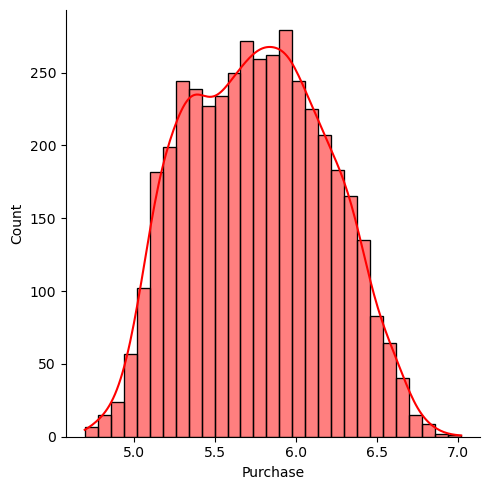

In [144]:
plt.figure(figsize=(12,6))


C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


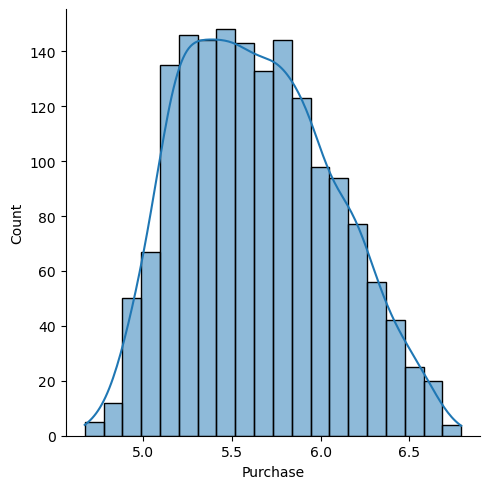

In [150]:
from scipy.stats import norm
from statsmodels.stats import weightstats as stests

## Define Null Hypothesis

- **`H0: u1 <= u2`**
- **`Ha: u1 > u2`**
- `u1: Mean purchase value of Women `
- `u2: Mean purchase value of Men`

## Distribution of samples

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Purchase distribution of Women')

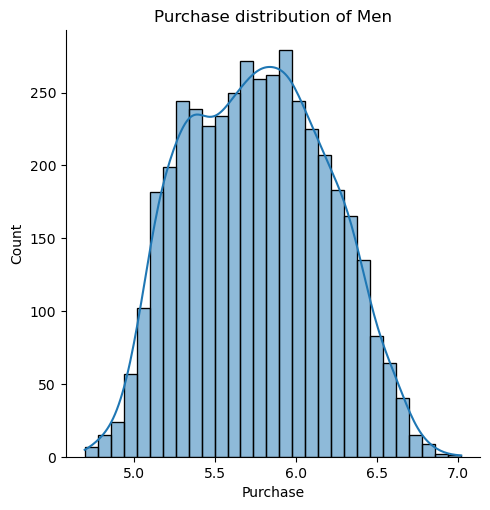

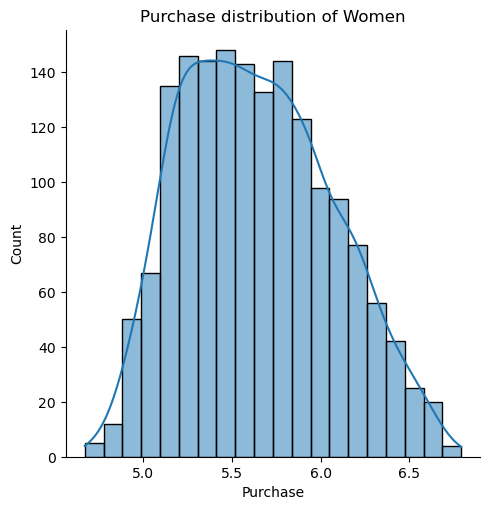

In [157]:
sns.displot(np.log10(df_m), kde=True)
plt.title('Purchase distribution of Men')
sns.displot(np.log10(df_w), kde=True)
plt.title('Purchase distribution of Women')

## Type of Test

**Right Sided Test**

## Compute Zstat and P value

In [151]:
zstat, pval = stests.ztest(df_w, df_m, value=0, alternative='greater')
zstat,pval

(-7.854264073762262, 0.999999999999998)

In [156]:
alpha = 0.05
if pval < alpha:
    print("Reject Null Hypothesis. Hence, Mean purchase value of Women is greater than Men")
else:
    print("Fail to Reject Null Hypothesis. Hence, Mean purchase value of Women is less than or equal to Men")

Fail to Reject Null Hypothesis. Hence, Mean purchase value of Women is less than or equal to Men


In [152]:
df_w.mean(), df_m.mean()

(712024.3949579832, 925344.4023668639)

In [153]:
df[['Gender', 'Purchase']].groupby('Gender').mean()

,Purchase
Gender,
F,8734.565765
M,9437.526040


# Central Limit Theorem

## Explore CLT on Purchase vs Gender data

In [27]:
df_grp = df[['User_ID', 'Gender', 'Purchase']].groupby(['User_ID', 'Gender']).sum().reset_index()
df_m = df_grp[df_grp['Gender'] == 'M']['Purchase']
df_w = df_grp[df_grp['Gender'] != 'M']['Purchase']

Text(0.5, 1.0, 'Purchase distribution of Women Customers')

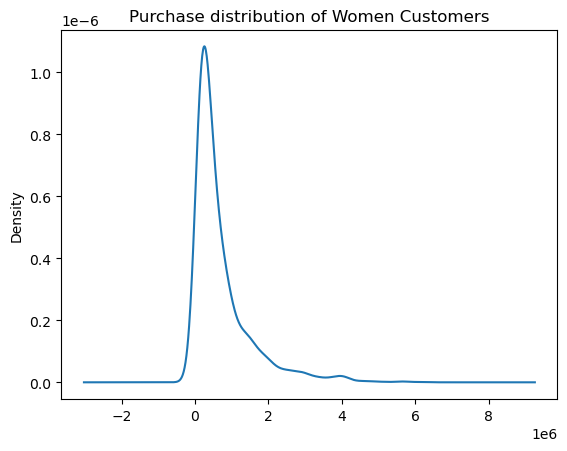

In [29]:
df_w.plot(kind='kde')
plt.title("Purchase distribution of Women Customers")

Text(0.5, 1.0, 'Purchase distribution of Men Customers')

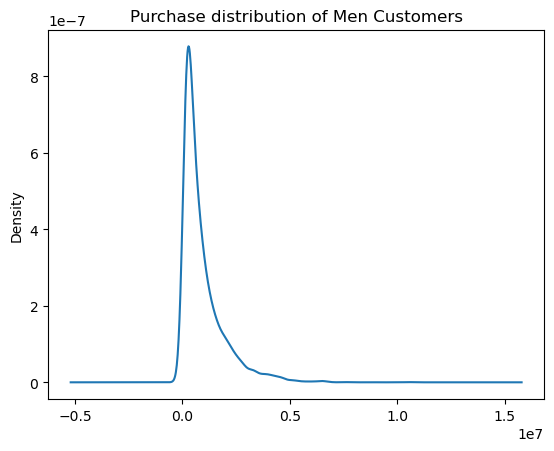

In [30]:
df_m.plot(kind='kde')
plt.title("Purchase distribution of Men Customers")

**Inference:**
- Both the purchase distribution of Men and Women customers of sample data are slightly right skewed

## CLT on Men sample: Various no. of sample sizes and Fixed no. of iterations

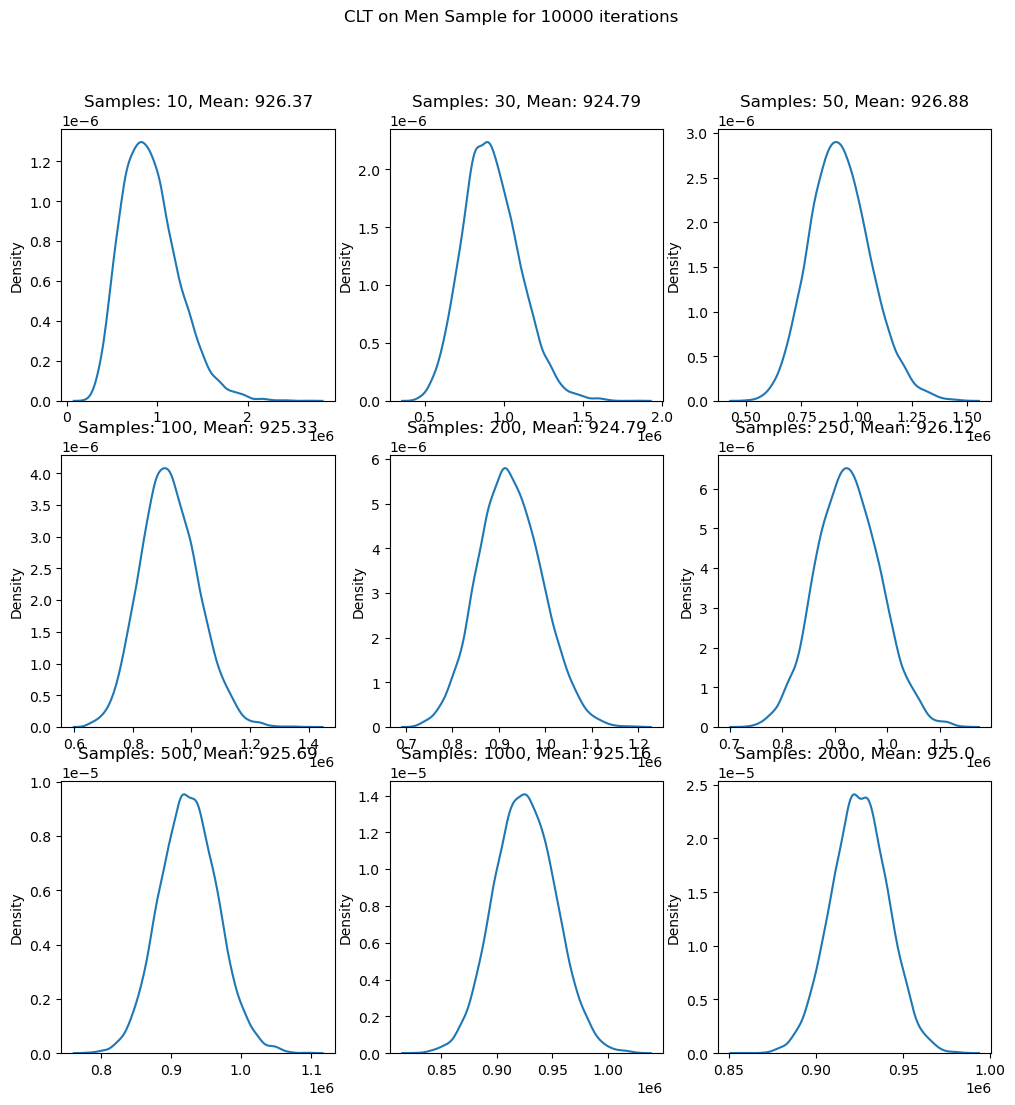

In [170]:
plt.figure(figsize=(12,15)).suptitle('CLT on Men Sample for 10000 iterations')
n_sample = [10, 30, 50, 100, 200, 250, 500, 1000, 2000]
n_iter = 10000
k = 1
for samp in n_sample:
    plt.subplot(3,3,k)
    sample_mean = np.array([df_m.sample(samp).mean() for j in range(n_iter)])
    sns.kdeplot(sample_mean)
    plt.title('Samples: ' + str(samp) + ', Mean: ' + str(round(np.mean(sample_mean) / 1000, 2)))
    k = k + 1

**Inference:**
- Normal Distribution: The graphs of the distributions across iterations are normally distributed. This supports the Central Limit Theorem (CLT), which states that the distribution of the sample mean (or other estimators) approaches a normal distribution as the sample size increases, regardless of the original data distribution.
- Decreasing Distribution Width with Increasing Sample Size: As the sample size increases, the width of the distribution narrows, which is a common result of larger samples providing more precise estimates.

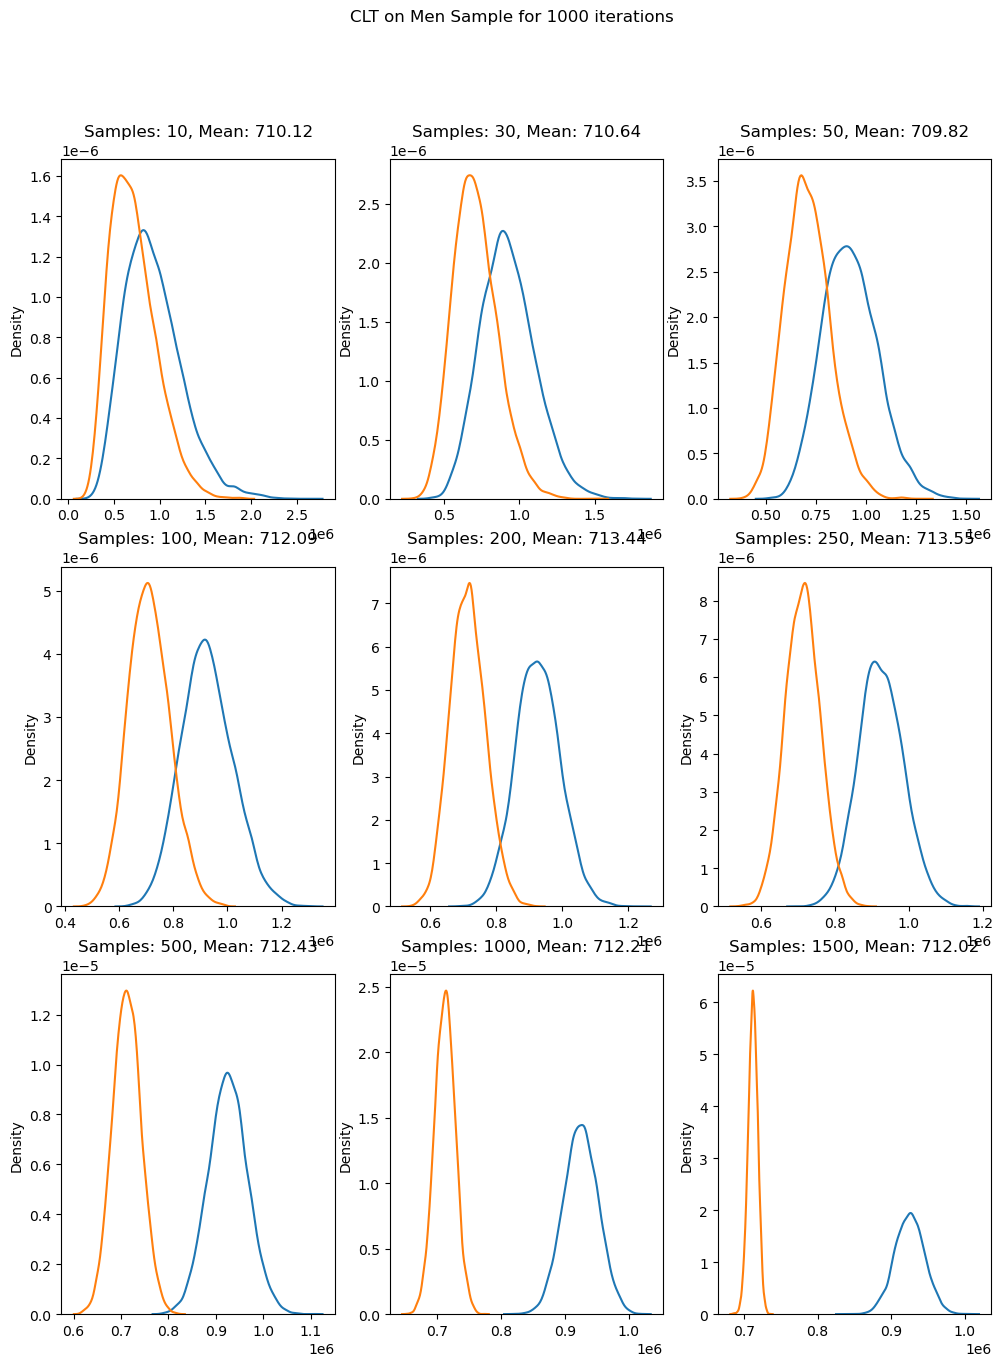

In [173]:
plt.figure(figsize=(12,15)).suptitle('CLT on Men and Women Sample for 10000 iterations')
n_sample = [10, 30, 50, 100, 200, 250, 500, 1000, 1500]
n_iter = 10000
k = 1
for samp in n_sample:
    plt.subplot(3,3,k)
    sample_mean = np.array([df_m.sample(samp).mean() for j in range(n_iter)])
    sns.kdeplot(sample_mean)
    sample_mean = np.array([df_w.sample(samp).mean() for j in range(n_iter)])
    sns.kdeplot(sample_mean)
    plt.title('Samples: ' + str(samp) + ', Mean: ' + str(round(np.mean(sample_mean) / 1000, 2)))
    k = k + 1

**Inference:**
- For small sample sizes the mean distribution of women and men are overlapping
- By increasing the sample size, the width of the distribution is controlled. Hence the distribution of mean purchase of men and women moves away from each other

In [ ]:
plt.figure(figsize=(12,16)).suptitle('CLT on Women Sample for 1000 iterations')
n_sample = [10, 30, 50, 100, 200, 250, 500, 1000, 2000]
n_iter = 10000
k = 1
for samp in n_sample:
    plt.subplot(3,3,k)
    sample_mean = np.array([df_w.sample(samp).mean() for j in range(n_iter)])
    sns.kdeplot(sample_mean)
    plt.title('Samples: ' + str(samp) + ', Mean: ' + str(round(np.mean(sample_mean) / 1000, 2)))
    k = k + 1

In [ ]:
plt.figure(figsize=(12,16)).suptitle('CLT on Women Sample for 10000 iterations')
n_sample = [10, 30, 50, 100, 200, 250, 500, 1000, 2000]
n_iter = 10000
k = 1
for samp in n_sample:
    plt.subplot(3,3,k)
    sample_mean = np.array([df_w.sample(samp).mean() for j in range(n_iter)])
    sns.kdeplot(sample_mean)
    plt.title('Samples: ' + str(samp) + ', Mean: ' + str(round(np.mean(sample_mean) / 1000, 2)))
    k = k + 1

## Finding limits for Confidence Intervals (90%, 95%, 99%)

In [48]:
def FindOverlap(n_samp, n_iter, conf, df_m, df_w):
    f_arr = np.array([df_w.sample(n_samp).mean() for j in range(n_iter)])
    f_mean = f_arr.mean()
    f_std = df_w.std()/np.sqrt(n_samp)
    m_arr = np.array([df_m.sample(n_samp).mean() for j in range(n_iter)])
    m_mean = m_arr.mean()
    m_std = df_m.std()/np.sqrt(n_samp)
    # 90% CI
    alpha = (1-conf)/2
    z = norm.ppf(alpha)
    
    f_limits = [np.round(f_mean + z * f_std), np.round(f_mean), np.round(f_mean - z * f_std)]
    m_limits = [np.round(m_mean + z * m_std), np.round(m_mean), np.round(m_mean - z * m_std)]
    
    if (f_limits[0] > m_limits[2]) or (m_limits[0] > f_limits[2]):
        print('Not Overlapping for sample size ', n_samp)        
    else:
        print('Overlapping for sample size ', n_samp)
    print("Left Limits: ", f_limits)
    print("Right Limits: ", m_limits)
    return f_arr, m_arr, f_limits, m_limits

### Gender and Puchase

In [42]:
print('The expected population mean purchase amount for Male customers of 50 million is ', np.round(df_m.mean()))
print('The expected population mean purchase amount for Female customers of 50 million is ', np.round(df_w.mean()))

The expected population mean purchase amount for Male customers of 50 million is  925344.0
The expected population mean purchase amount for Female customers of 50 million is  712024.0


**Inference:**
- The expected mean purchase amount of Male customers is more than that of Female customers

Overlapping
F Limits:  [579950.0, 712751.0, 845551.0]
M Limits:  [762649.0, 924804.0, 1086959.0]
Not Overlapping
F Limits:  [617179.0, 711083.0, 804988.0]
M Limits:  [811398.0, 926058.0, 1040719.0]
Not Overlapping
F Limits:  [635745.0, 712417.0, 789090.0]
M Limits:  [832476.0, 926096.0, 1019716.0]


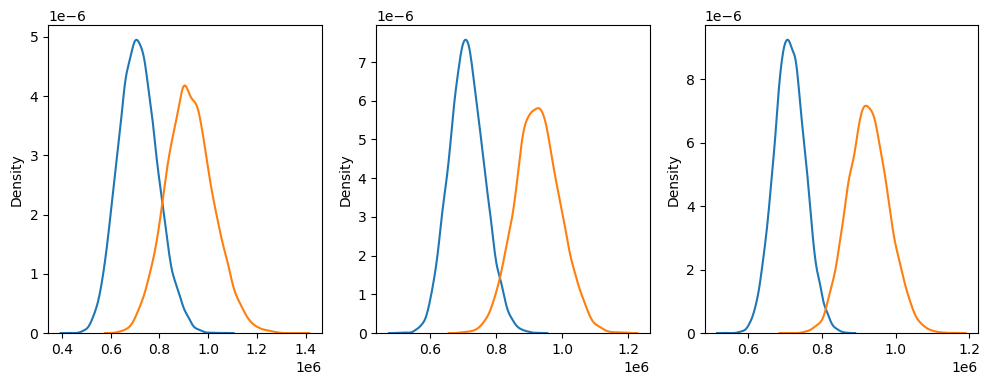

In [37]:
plt.figure(figsize = (12,4)).suptitle('90% Confidence Interval')
samples = [100, 200, 300]
plt_cnt = 1
for samp in samples:
    arr1, arr2, lim1, lim2 = FindOverlap(samp, 10000, 0.9, df_m, df_w)
    plt.subplot(1,3,plt_cnt)
    sns.kdeplot(arr1)
    sns.kdeplot(arr2)
    plt_cnt += 1

**Inference:**
- Confidence Interval: 90%, with 10,000 iterations fixed.
- Sample Size and Distribution Overlap:
    - Sample Size of 100: The mean distribution of purchases for men and women is overlapping, indicating little difference in purchase behavior between
      genders.
    - Sample Size of 200: The mean distribution of purchases for men and women shows no overlap, with a margin of 6,410. This suggests a significant
      difference in purchasing behavior between genders at this sample size.
    - Sample Size of 300: The mean distribution of purchases for men and women still shows no overlap, with a larger margin of 43,386. This indicates an
      even more pronounced difference in purchasing behavior with the increased sample size.

Overlapping
F Limits:  [612327.0, 712407.0, 812488.0]
M Limits:  [801088.0, 923291.0, 1045493.0]
Not Overlapping
F Limits:  [616338.0, 711761.0, 807184.0]
M Limits:  [809292.0, 925807.0, 1042323.0]
Not Overlapping
F Limits:  [621201.0, 712562.0, 803923.0]
M Limits:  [813796.0, 925352.0, 1036907.0]


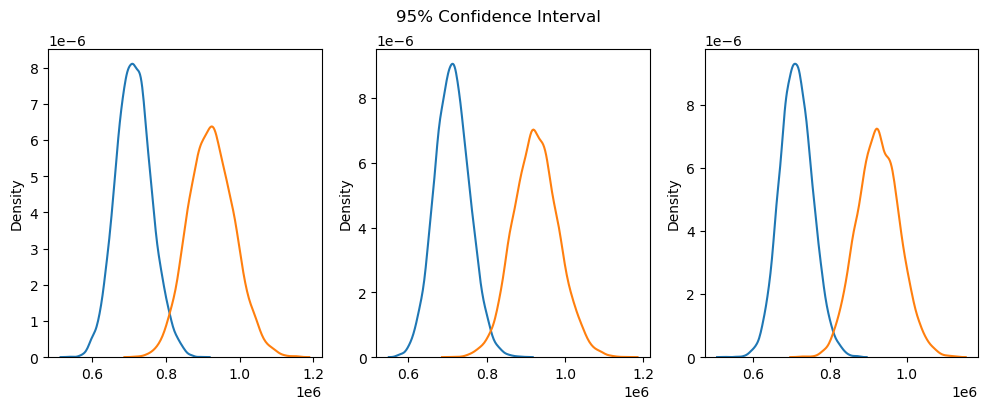

In [38]:
plt.figure(figsize = (12,4)).suptitle('95% Confidence Interval')
plt_cnt = 1
samples = [250, 275, 300]
for samp in samples:
    arr1, arr2, lim1, lim2 = FindOverlap(samp, 10000, 0.95, df_m, df_w)
    plt.subplot(1,3,plt_cnt)
    sns.kdeplot(arr1)
    sns.kdeplot(arr2)
    plt_cnt += 1

**Inference:**
- Confidence Interval: 95%, with 10,000 iterations fixed.
- Sample Size and Distribution Overlap:
    - For a 90% confidence interval, the significant non-overlapping behavior between male and female purchase distributions is observed at the sample
      size of 200. Therefore, for 95% CI, we need atleast sample size >200.
    - Sample Size of 250: The mean distribution of purchases for men and women is overlapping, indicating little difference in purchase behavior between
      genders.
    - Sample Size of 275: The mean distribution of purchases for men and women shows no overlap, with a margin of 2108. This suggests a significant
      difference in purchasing behavior between genders at this sample size.
    - Sample Size of 300: The mean distribution of purchases for men and women still shows no overlap, with a larger margin of 9873. This indicates an
      even more pronounced difference in purchasing behavior with the increased sample size.

Overlapping
F Limits:  [613976.0, 712011.0, 810047.0]
M Limits:  [805893.0, 925599.0, 1045304.0]
Not Overlapping
F Limits:  [616759.0, 712180.0, 807600.0]
M Limits:  [808462.0, 924974.0, 1041487.0]
Not Overlapping
F Limits:  [619843.0, 712847.0, 805852.0]
M Limits:  [812083.0, 925646.0, 1039208.0]


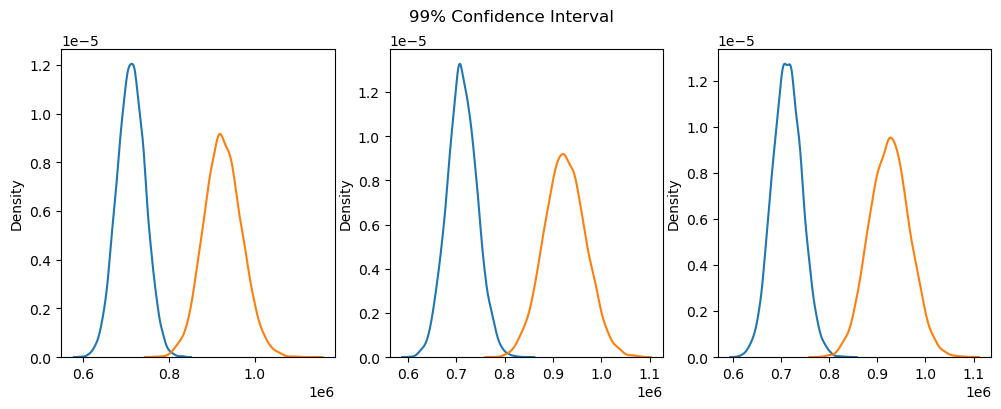

In [39]:
plt.figure(figsize = (12,4)).suptitle('99% Confidence Interval')
plt_cnt = 1
samples = [450, 475, 500]
for samp in samples:
    arr1, arr2, lim1, lim2 = FindOverlap(samp, 10000, 0.99, df_m, df_w)
    plt.subplot(1,3,plt_cnt)
    sns.kdeplot(arr1)
    sns.kdeplot(arr2)
    plt_cnt += 1

**Inference:**
- Confidence Interval: 99%, with 10,000 iterations fixed.
- Sample Size and Distribution Overlap:
    - For a 95% confidence interval, the significant non-overlapping behavior between male and female purchase distributions is observed at the sample
      size of 300. Therefore, for 99% CI, we need atleast sample size >300.
    - Sample Size of 450: The mean distribution of purchases for men and women is overlapping, indicating little difference in purchase behavior between
      genders.
    - Sample Size of 475: The mean distribution of purchases for men and women shows no overlap, with a margin of 862. This suggests a significant
      difference in purchasing behavior between genders at this sample size.
    - Sample Size of 500: The mean distribution of purchases for men and women still shows no overlap, with a larger margin of 6231. This indicates an
      even more pronounced difference in purchasing behavior with the increased sample size.

### Marital Status and Purchase

In [44]:
df_grp = df[['User_ID', 'Marital_Status', 'Purchase']].groupby(['User_ID', 'Marital_Status']).sum().reset_index()
popmean = df_grp.drop('User_ID', axis=1).groupby('Marital_Status').mean()
popmean

,Purchase
Marital_Status,
0,880575.781972
1,843526.796686


**Inference:**
- The expected population mean purchase amount for unmarried customers is 880575
- The expected population mean purchase amount for married customers is 843526
- The expected mean purchase amount of unmarried customers is slightly greater than that of married customers

In [46]:
df_unmar = df_grp[df_grp['Marital_Status'] == 0]['Purchase']
df_mar = df_grp[df_grp['Marital_Status'] != 0]['Purchase']
print("Maximum no. of Unmarried samples is ", df_unmar.count())
print("Maximum no. of Married samples is ", df_mar.count())

Maximum no. of Unmarried samples is  3417
Maximum no. of Married samples is  2474


**Inference:**
- The maximum sample size for bootstrapping is 2474

Overlapping for sample size  50
F Limits:  [661138.0, 881993.0, 1102849.0]
M Limits:  [624633.0, 842212.0, 1059792.0]
Overlapping for sample size  100
F Limits:  [725189.0, 881357.0, 1037526.0]
M Limits:  [688865.0, 842717.0, 996569.0]
Overlapping for sample size  500
F Limits:  [810688.0, 880529.0, 950370.0]
M Limits:  [774091.0, 842896.0, 911700.0]
Overlapping for sample size  1000
F Limits:  [831452.0, 880836.0, 930221.0]
M Limits:  [794715.0, 843367.0, 892019.0]
Overlapping for sample size  1500
F Limits:  [840438.0, 880761.0, 921083.0]
M Limits:  [804058.0, 843782.0, 883506.0]
Overlapping for sample size  2400
F Limits:  [848834.0, 880712.0, 912590.0]
M Limits:  [812113.0, 843518.0, 874923.0]


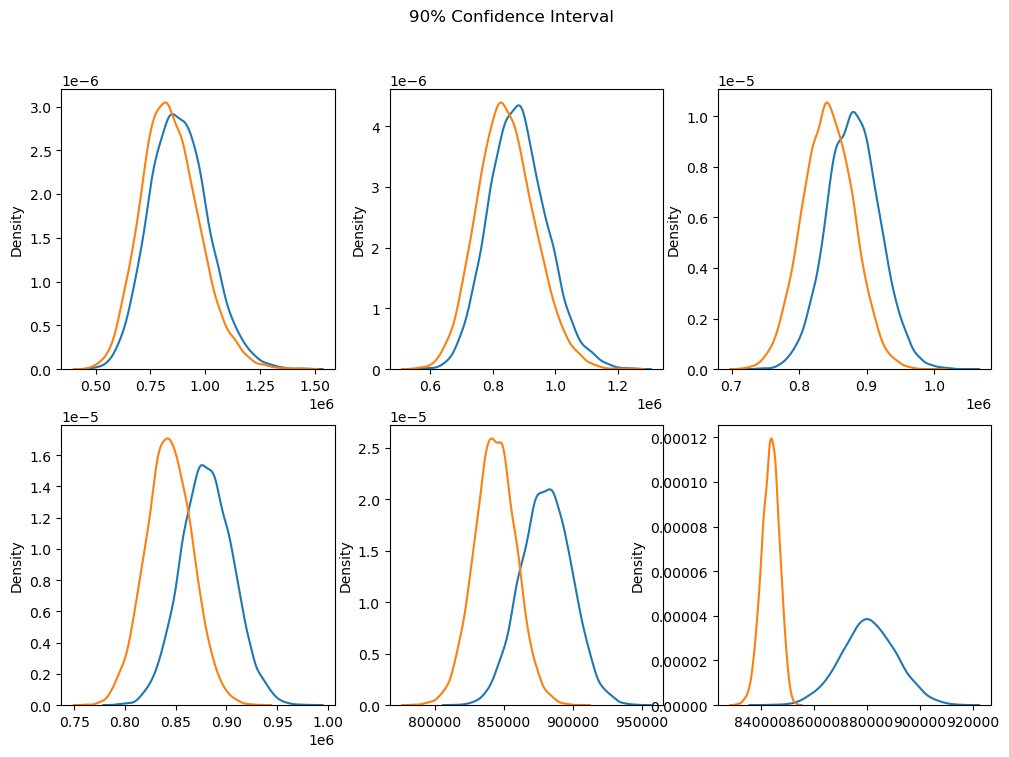

In [49]:
plt.figure(figsize = (12,8)).suptitle('90% Confidence Interval')
plt_cnt = 1
samples = [50, 100, 500, 1000, 1500, 2400]
for samp in samples:
    arr1, arr2, lim1, lim2 = FindOverlap(samp, 10000, 0.9, df_mar, df_unmar)
    plt.subplot(2,3,plt_cnt)
    sns.kdeplot(arr1)
    sns.kdeplot(arr2)
    plt_cnt += 1

In [50]:
samples = [2470] # [50, 100, 500, 1000, 1500, 2400]
for samp in samples:
    FindOverlap(samp, 50000, 0.9, df_mar, df_unmar)

Overlapping for sample size  2470
F Limits:  [849159.0, 880582.0, 912004.0]
M Limits:  [812578.0, 843535.0, 874492.0]


In [234]:
samples = [2470] # [50, 100, 500, 1000, 1500, 2400]
for samp in samples:
    FindOverlap(samp, 10000, 0.95, df_mar, df_unmar)

Overlapping
F Limits:  [843127.0, 880570.0, 918012.0]
M Limits:  [806637.0, 843524.0, 880411.0]


In [235]:
samples = [2470] # [50, 100, 500, 1000, 1500, 2400]
for samp in samples:
    FindOverlap(samp, 10000, 0.99, df_mar, df_unmar)

Overlapping
F Limits:  [831411.0, 880619.0, 929827.0]
M Limits:  [795049.0, 843526.0, 892004.0]


In [ ]:
**Inference:**
- Confidence Interval: 95%, with 10,000 iterations fixed.
- Sample Size and Distribution Overlap:
    - The maximum number of sample size is 
    - For a 95% confidence interval, the significant non-overlapping behavior between male and female purchase distributions is observed at the sample
      size of 300. Therefore, for 99% CI, we need atleast sample size >300.
    - Sample Size of 450: The mean distribution of purchases for men and women is overlapping, indicating little difference in purchase behavior between
      genders.
    - Sample Size of 475: The mean distribution of purchases for men and women shows no overlap, with a margin of 862. This suggests a significant
      difference in purchasing behavior between genders at this sample size.
    - Sample Size of 500: The mean distribution of purchases for men and women still shows no overlap, with a larger margin of 6231. This indicates an
      even more pronounced difference in purchasing behavior with the increased sample size.

### Age and Purchase

In [237]:
df_grp = df[['User_ID', 'Age', 'Purchase']].groupby(['User_ID', 'Age']).sum().reset_index()
popmean = df_grp.drop('User_ID', axis=1).groupby('Age').mean()
popmean

,Purchase
Age,
0-17,618867.811927
18-25,854863.119738
26-35,989659.317097
36-45,879665.710368
46-50,792548.781544
51-55,763200.923077
55+,539697.244624


In [255]:
df_grp['Age'].value_counts().sort_index()

0-17      218
18-25    1069
26-35    2053
36-45    1167
46-50     531
51-55     481
55+       372
Name: Age, dtype: int64

In [239]:
df_17 = df_grp[df_grp['Age'] == '0-17']['Purchase']
df_25 = df_grp[df_grp['Age'] == '18-25']['Purchase']

In [256]:
def find_overlaps(n_samp, n_iter, col_name, conf, df_grp):
    limits = []

    unique_val = list(np.sort(df_grp[col_name].unique()))
    alpha = (1-conf)/2
    z = norm.ppf(alpha)
    for i in range(len(unique_val)):
        temp_df = df_grp[df_grp[col_name] == unique_val[i]]['Purchase']
        mean_arr = np.array([temp_df.sample(n_samp).mean() for j in range(n_iter)])
        samp_std = temp_df.std()/np.sqrt(n_samp)    
        limits.append([np.round(mean_arr.mean() + z * samp_std), np.round(mean_arr.mean()), np.round(mean_arr.mean() - z * samp_std)])
    return limits
#     if (f_limits[0] > m_limits[2]) or (m_limits[0] > f_limits[2]):
#         print('Not Overlapping')        
#     else:
#         print('Overlapping')
#     print("F Limits: ", f_limits)
#     print("M Limits: ", m_limits)
#     return f_limits, m_limits

In [254]:
find_overlaps(200, 10000, 'Age', 0.9, df_grp)

[[538861.0, 618772.0, 698683.0],
 [751204.0, 854481.0, 957759.0],
 [870144.0, 990129.0, 1110114.0],
 [764736.0, 878902.0, 993069.0],
 [683339.0, 791425.0, 899510.0],
 [670469.0, 762623.0, 854777.0],
 [468047.0, 539866.0, 611684.0]]